In [8]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[5, 1, 2, 5, 2, 5, 7], [2, 4, 7, 4, 5, 2, 10], [0, 5, 3, 7, 2, 9, 4]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=1.5)


Automatically created module for IPython interactive environment


In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[-0.89551247,  3.10973851],
       [ 0.45735958,  1.85824391],
       [-2.53488847,  8.74400329],
       ..., 
       [ 1.64488269,  7.57421115],
       [ 0.11043451,  8.04899545],
       [ 1.25934349,  2.63766893]])

In [10]:

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms = MeanShift(bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 3


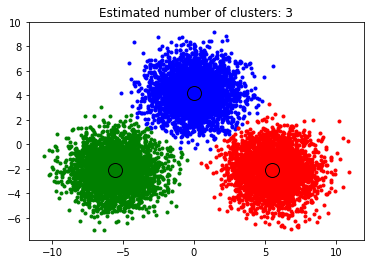

In [11]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()